In [1]:
import pandas as pd
import numpy as np

In [2]:
labels_true = pd.read_pickle('./data_labels/labels_zro2.pkl')
labels_true['labels_0_4'] = labels_true['labels_0_4'].replace({'m': 0,
                                                        'p-o': 1,
                                                        'o': 2,
                                                        't': 3,
                                                        'unknown': 4})

y_true = labels_true['labels_0_4']
y_true.values

array([0, 2, 1, ..., 2, 4, 3], dtype=int64)

In [3]:
# test if 222 crystals make a difference
df = pd.read_pickle('./df_prdf_zro2.pkl')
#df.insert(loc=2, column='y_true', value=y_true)
#df = df[~df.name.str.contains("222")]
df

,structure,name,Zr-Zr PRDF r=0.00-0.50,Zr-Zr PRDF r=0.50-1.00,Zr-Zr PRDF r=1.00-1.50,Zr-Zr PRDF r=1.50-2.00,Zr-Zr PRDF r=2.00-2.50,Zr-Zr PRDF r=2.50-3.00,Zr-Zr PRDF r=3.00-3.50,Zr-Zr PRDF r=3.50-4.00,...,O-O PRDF r=15.00-15.50,O-O PRDF r=15.50-16.00,O-O PRDF r=16.00-16.50,O-O PRDF r=16.50-17.00,O-O PRDF r=17.00-17.50,O-O PRDF r=17.50-18.00,O-O PRDF r=18.00-18.50,O-O PRDF r=18.50-19.00,O-O PRDF r=19.00-19.50,O-O PRDF r=19.50-20.00
0,"[[1.39842671 2.40664143 4.37446042] Zr, [3.615...",Ag_ZrO2_cat_3.125_222_m.cif,0.0,0.0,0.0,0.0,0.0,0.000000,0.088289,0.042287,...,0.061330,0.056475,0.061001,0.065090,0.051092,0.056937,0.062655,0.069416,0.043605,0.059658
1,"[[1.41037568 2.41800359 4.39765312] Zr, [3.632...",Ag_ZrO2_cat_3.125_222_o.cif,0.0,0.0,0.0,0.0,0.0,0.000000,0.097991,0.041558,...,0.062549,0.052566,0.065333,0.062023,0.050942,0.059967,0.054636,0.067548,0.057549,0.056776
2,"[[-8.63451586 -8.02576822 -6.33664411] Zr, [-6...",Ag_ZrO2_cat_3.125_222_p-o.cif,0.0,0.0,0.0,0.0,0.0,0.000000,0.074706,0.075097,...,0.066505,0.062730,0.059890,0.060126,0.060051,0.056573,0.062386,0.065002,0.062582,0.055782
3,"[[ 1.30468543 -7.65082882 3.77109169] Zr, [ 3...",Ag_ZrO2_cat_3.125_222_t.cif,0.0,0.0,0.0,0.0,0.0,0.000000,0.001940,0.129779,...,0.073647,0.050321,0.072094,0.067465,0.044424,0.057647,0.080648,0.057533,0.057308,0.056483
4,"[[1.38880269 2.40992106 4.37773968] Zr, [3.657...",Ag_ZrO2_cat_6.25_122_m.cif,0.0,0.0,0.0,0.0,0.0,0.000000,0.086219,0.040683,...,0.061586,0.057137,0.061246,0.064274,0.052079,0.055563,0.061908,0.070081,0.043672,0.059160
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1720,"[[-8.87001828 -5.13740927 -8.87001828] Zr, [-8...",Zr_ZrO2_inter_6.25_212_t.cif,0.0,0.0,0.0,0.0,0.0,0.014815,0.028307,0.106362,...,0.068600,0.045228,0.081662,0.058141,0.052948,0.050638,0.077049,0.059527,0.055724,0.062322
1721,"[[ 1.25503143 -10.19349096 -3.47224897] Zr, ...",Zr_ZrO2_inter_6.25_221_m.cif,0.0,0.0,0.0,0.0,0.0,0.009876,0.076076,0.041215,...,0.057951,0.050722,0.067311,0.062041,0.046797,0.054079,0.056801,0.068213,0.054248,0.047609
1722,"[[ -8.73042916 -10.14298992 2.09308249] Zr, ...",Zr_ZrO2_inter_6.25_221_o.cif,0.0,0.0,0.0,0.0,0.0,0.012346,0.081384,0.038556,...,0.057566,0.054050,0.061284,0.064345,0.047767,0.054900,0.056383,0.066686,0.055482,0.052734
1723,"[[-8.87228424 9.95995753 -4.04166983] Zr, [-8...",Zr_ZrO2_inter_6.25_221_p-o.cif,0.0,0.0,0.0,0.0,0.0,0.014815,0.028307,0.106362,...,0.068600,0.045228,0.081662,0.058141,0.052948,0.050638,0.077109,0.059527,0.055670,0.062322


In [25]:
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
X = df.iloc[:,2:]
# X, y_true = shuffle(X, y_true, random_state=0)
X = X.values

In [12]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X = scaler.fit_transform(X)
X

array([[0.        , 0.        , 0.        , ..., 0.83953168, 0.08736426,
        0.69904648],
       [0.        , 0.        , 0.        , ..., 0.74862259, 0.60019743,
        0.56436234],
       [0.        , 0.        , 0.        , ..., 0.62465565, 0.78529121,
        0.51787843],
       ...,
       [0.        , 0.        , 0.        , ..., 0.70661157, 0.52418559,
        0.37544696],
       [0.        , 0.        , 0.        , ..., 0.35812672, 0.53109576,
        0.82359952],
       [0.        , 0.        , 0.        , ..., 0.35812672, 0.53307009,
        0.82359952]])

In [13]:
from sklearn.cluster import KMeans
y_pred = KMeans(n_clusters=5, random_state=0).fit_predict(X)
y_pred

array([3, 1, 0, ..., 1, 4, 4])

In [18]:
from sklearn import metrics
metrics.silhouette_score(X, y_pred, metric='l1')

0.36165915939182774

C:\Users\Maxi\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


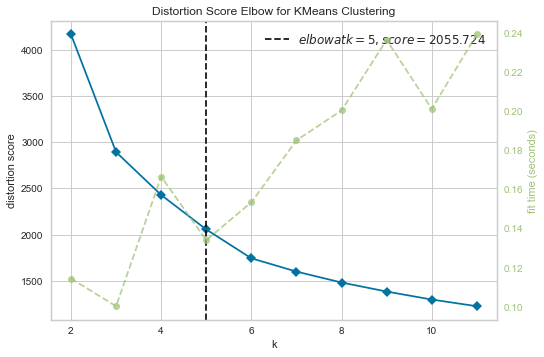

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [15]:

from yellowbrick.cluster import KElbowVisualizer
kmeans = KMeans()

visualizer = KElbowVisualizer(kmeans, k=(2,12))

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

In [131]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

db = DBSCAN(eps=0.05, min_samples=5).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

unique, counts = np.unique(labels, return_counts=True)
print(dict(zip(unique, counts)))


print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X, labels))

{-1: 7, 0: 1707, 1: 11}
Estimated number of clusters: 2
Estimated number of noise points: 7
Silhouette Coefficient: -0.055


In [77]:
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

In [78]:
# Random Forest
classifier = RandomForestClassifier(n_estimators = 38, criterion = 'entropy', random_state = 42)
scores = cross_val_score(classifier, X, y_true, cv=10, scoring='accuracy')
print(scores.mean())

0.9304375588116681


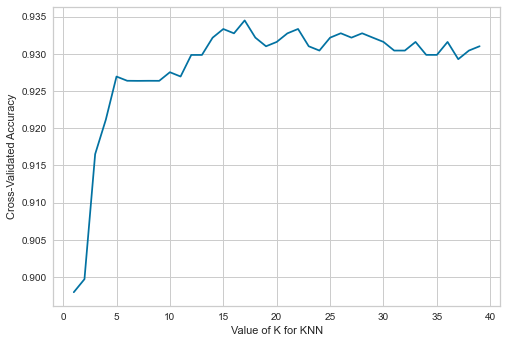

In [79]:
import matplotlib.pyplot as plt
# choose k between 1 to 31
k_range = range(1, 40)

k_scores = []# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    rfc =  RandomForestClassifier(n_estimators = k, criterion = 'entropy', random_state = 42)
    scores = cross_val_score(rfc, X, y_true, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())# plot to see clearly
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

In [80]:
# try with KNN
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=17)
scores = cross_val_score(neigh, X, y_true, cv=10, scoring='accuracy')
print(scores.mean())

0.9200262132006991


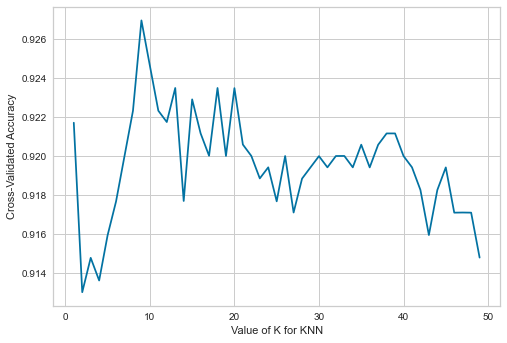

In [81]:
import matplotlib.pyplot as plt
# choose k between 1 to 31
k_range = range(1, 50)

k_scores = []# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y_true, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())# plot to see clearly
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()